# tm 패키지를 활용한 Corpus만들기

* 텍스트 마이닝을 수행하기 전에 tm 패키지를 활용해 Corpus를 만들고 생성된 Corpus를 전처리 하고 분석에 활용하여야 한다.

* `VectorSource` 함수를 사용하고 문서로 완성된 데이터를 `VCorpus` 함수를 이용하여 `Corpus`로 만든다.

In [41]:
library(tm)

* `crude` 데이터는 `tm` 패키지 내에 내장된 `Corpus`데이터 이다.

* `inspect` 하수를 이용해 첫 번째 문서의 정보를 확인한다.

In [13]:
inspect(crude[1])

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1

$`reut-00001.xml`
<<PlainTextDocument>>
Metadata:  15
Content:  chars: 527



## tm 패키지를 활용한 데이터 전처리

* tm_map(x, tolower)  : 소문자로 만들기
* tm_map(x, stemDocument) : 어근만 남기기
* tm_map(x, stripWhitespace) : 공백 제거
* tm_map(x, removePunctuation) : 문장부호 제거
* tm_map(x, removeNumbers) : 숫자 제거
* tm_map(x, removeWords, "words") : 특정 단어 제거
* tm_map(x, removeWords,stopwords ("english)) : 불용어 제거
* tm_map(x, PlainTextDocument) : TextDocument로 변환

In [44]:
setwd("C:\\Users\\rkdcj\\OneDrive\\바탕 화면\\PART 06 실습용 데이터")

In [27]:
library(tm)

* 데이터 로드

In [45]:
news <- readLines("키워드_뉴스.txt")

In [29]:
news.corpus <- VCorpus(VectorSource(news))

In [31]:
news.corpus

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 10

* 전처리 함수 생성

In [32]:
clean_txt <- function(txt) {
        txt <- tm_map(txt, removeNumbers) ## 숫자제거
        txt <- tm_map(txt, removePunctuation) ## 문장부호 제거
        txt <- tm_map(txt, stripWhitespace)  ## 공백제거
        
        return(txt)
}

In [33]:
clean.news <- clean_txt(news.corpus)

In [21]:
news.corpus[[1]]$content

[1] "동아대학교(총장 한석정)가 '수요자 데이터기반 스마트헬스케어 서비스'분야 ‘4차 산업혁명 혁신선도대학으로 최종선정됐습니다. 동아대가 혁신선도대학으로 펼치게 될 ‘수요자 데이터기반 스마트헬스케어 서비스’ 산업은 리빙데이터(운동·영양·약물)와 메디컬데이터(생체계측·진료기록)를 종합 분석, 다양한 헬스케어 서비스를 제공하는 것입니다. 동아대는 건강과학대학과 의료원, 재활요양병원 등 경쟁력 있는 인프라를 바탕으로 신뢰도 높은 정밀 분석을 실시, ‘헬스케어 기획 전문가’와 ‘헬스케어 데이터분석 전문가’ 등 수요자 맞춤형 헬스케어 서비스 분야를 선도하는 전문 인재를 키워나갈 계획입니다. ‘스마트헬스케어 융합전공’을 신설, 경영정보학과를 중심으로 한 빅데이터 분석, 식품영양학과·의약생명공학과·건강관리학과 중심의 헬스케어 등 학문 간 경계는 교육혁신도 이뤄나갈 방침입니다. "

In [35]:
clean.news[[1]]$content

[1] "동아대학교총장 한석정가 수요자 데이터기반 스마트헬스케어 서비스분야 ‘차 산업혁명 혁신선도대학으로 최종선정됐습니다 동아대가 혁신선도대학으로 펼치게 될 ‘수요자 데이터기반 스마트헬스케어 서비스’ 산업은 리빙데이터운동·영양·약물와 메디컬데이터생체계측·진료기록를 종합 분석 다양한 헬스케어 서비스를 제공하는 것입니다 동아대는 건강과학대학과 의료원 재활요양병원 등 경쟁력 있는 인프라를 바탕으로 신뢰도 높은 정밀 분석을 실시 ‘헬스케어 기획 전문가’와 ‘헬스케어 데이터분석 전문가’ 등 수요자 맞춤형 헬스케어 서비스 분야를 선도하는 전문 인재를 키워나갈 계획입니다 ‘스마트헬스케어 융합전공’을 신설 경영정보학과를 중심으로 한 빅데이터 분석 식품영양학과·의약생명공학과·건강관리학과 중심의 헬스케어 등 학문 간 경계는 교육혁신도 이뤄나갈 방침입니다 "

* 확인 결과 " ', $\cdot$ "와 같은 부호는 제거 되지않음

* 아래와 같은 함수를 사용하여 제거해준다.

In [54]:
txt<- gsub("[[:punct:]]","",clean.news)

***

# KoNLP 패키지를 활용한 한글처리

In [34]:
library(IRdisplay)

In [5]:
library(KoNLP)

* bulidDictionary(ext_dic, data) : 추가하고자 하는 단어와 품사가 들어간 **data.frame** 또는 **txt** 파일을 사전에 추가
    * ext_dic : `woorimasam, sejong, insighter` 이 있음

* extraNoun(text) : 명사를 추출하고자 하는 문장 또는 문서

* SimplePos22(text) : 형태소 분석을 하고자 하는 문장 또는 문서

* 간단한 문장으로 명사 추출, 사전 단어 추가, 품사를 확인해보자

In [23]:
useSejongDic() ## 세종사전 사용

Backup was just finished!
370957 words dictionary was built.


In [24]:
sentence <- "아버지가 방에 스르륵 들어가신다."

In [25]:
extractNoun(sentence) ## 명사추출 스르륵은 명사가 아니다.

[1] "아버지" "방"     "스르륵"

In [29]:
buildDictionary(ext_dic="sejong",
               user_dic = data.frame(c("스르륵"),c("mag")))  ## 스르륵을 부사로 추가

370961 words dictionary was built.


* 스르륵을 부사로 추가 후 다시 명사를 추출하였을 때 제대로 추출되었음을 알 수 있음

In [30]:
extractNoun(sentence)

[1] "아버지" "방"

*  KoNLP에서 제공하는 품사태그는 아래와 같다.

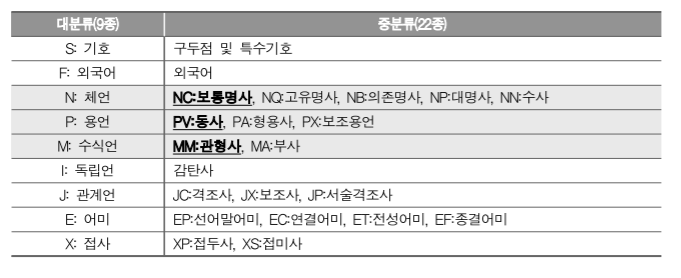

In [36]:
display_png(file="C:\\Users\\rkdcj\\OneDrive\\바탕 화면\\품사.png")

* 아래의 함수를 이용하여 문장의 형태소 분석을 해보자.

In [31]:
SimplePos22(sentence)

$아버지가
[1] "아버지/NC+가/JC"

$방에
[1] "방/NC+에/JC"

$스르륵
[1] "스르륵/MA"

$들어가신다
[1] "들/PV+어/EC+가/PX+시/EP+ㄴ다/EF"

$.
[1] "./SF"

## news data not use Corpus

In [93]:
clean_txt2 <- function(txt) {
        txt <- removeNumbers(txt) ## 숫자제거
        txt <- removePunctuation(txt) ## 문장부호 제거
        txt <- stripWhitespace(txt) ## 공백제거
        txt <- gsub("[^[:alnum:]]"," ",txt) ## 영어와 숫자를 제거
        return(txt)
}

In [94]:
clean.news <- clean_txt2(news)

* 전처리 결과 `푸드테크`, `스타트업`  등과 같은 복합명사가 분리되어 출력되는 것을 확인할 수 있었다.

* 따라서 복합명사를 명사로 인식할 수 있도록 사전에 등록하고 다시 분석 결과를 확인하면 복합명사도 하나의 명사로 추가된 것으로 확인할 수 있다.

In [55]:
head(extractNoun(clean.news[5]))

[1] "푸드"     "테크"     "스타트"   "업"       "빅데이터" "기반"

In [56]:
buildDictionary(ext_dic= "sejong",
                user_dic=data.frame(c(read.table("food.txt"))))

370965 words dictionary was built.


In [59]:
read.table("food.txt")

V1,V2
<chr>,<chr>
푸드테크,ncn
스타트업,ncn
빅데이터,ncn
우아한형제들,ncn


In [57]:
head(extractNoun(clean.news[5]))

[1] "푸드테크" "스타트업" "들이"     "빅데이터" "기반"     "시스템"

* 위와 같이 복합명사도 하나의 명사로 추출된 것을 확인할 수 있다.

## SimplePos22를 활용해 형용사 추출하기

In [64]:
library(stringr) ## R에서 문자열을 처리할 수 있는 패키지

In [66]:
doc1 <- paste(SimplePos22(clean.news[[2]]))

In [68]:
head(doc1)

[1] "첨단/NC"                     "정보통신기술/NC+에/JC"      
[3] "AI/F"                        "등/NB+이/JC"                
[5] "더하/PA+어/EC+지/PX+면서/EC" "무기체계/NC+가/JC"

* 형용사의 품사는 PA 이므로 아래와 같은 함수를 이용하여 추출

In [69]:
doc2 <- str_match(doc1,"([가-힣]+)/PA") 

In [73]:
head(doc2)

NA,NA
NA,NA
NA,NA
NA,NA
더하/PA,더하
NA,NA


In [83]:
doc3 <- doc2 %>% na.omit()
doc3[,2]

[1] "더하"   "빠르"   "새롭"   "빠르"   "빠르"   "이러하" "걸맞"

## Stemming

* 어간추출은 정해진 규칙만 보고 단어의 어미를 자르는 어림짐작의 작업이라고 할 수 있다.
    * 즉, 공통 어간을 가지는 단어를 묶는 작업을 Stemming이라고 한다.

* R에서는 `tm`패키지에서 `stemDocument` 함수를 통해 공통으로 들어가지 않은 부분을 제외하고 `stemCompletion` 함수를 통해 `stemming`된 단어와 완성을 위한 `dictionary`를 함께 넣으면 기본적인 어휘로 완성해주는 역할을 한다.

In [89]:
test <- stemDocument(c("analyze","analyzed","analyzing"))
test

[1] "analyz" "analyz" "analyz"

* 아래에서 중요한것은 `stemCompletion` 함수를 사용할 때에는 단어의 완성을 위해 반드시 `dictionary`가 필요하다.

In [90]:
stemCompletion(test,dictionary =c("analyze","analyzed","analyzing") )

analyz    analyz    analyz 
"analyze" "analyze" "analyze"

## TDM

 * R에서 `tm`패키지의 `TermDocumentMatric`을 사용하여 문서-단어 빈도행렬을 만들 수 있다. 단 객체는 `Corpus` 객체를 이용하여야함.

In [100]:
VC.news <- VCorpus(VectorSource(clean.news))

In [102]:
inspect(TermDocumentMatrix(VC.news))

<<TermDocumentMatrix (terms: 1011, documents: 10)>>
Non-/sparse entries: 1144/8966
Sparsity           : 89%
Maximal term length: 14
Weighting          : term frequency (tf)
Sample             :
            Docs
Terms        1 10 2 3 4 5 6 7 8 9
  관계자는   0  1 0 1 0 3 0 1 0 0
  데이터     0  4 3 6 8 3 7 1 4 5
  밝혔다     0  1 0 1 2 0 1 0 2 0
  분석을     1  0 0 1 2 0 2 0 0 0
  브라이틱스 0  0 0 0 9 0 0 0 0 0
  빅데이터   1  1 3 1 2 5 0 2 1 4
  빅데이터를 0  2 0 0 0 5 0 0 0 1
  서비스를   1  2 1 0 0 2 2 0 0 0
  전문가     2  0 1 0 1 0 1 0 2 0
  활용한     0  0 2 0 1 0 2 0 2 1


* 총 10개의 기사에서 11의 단어가 추출된 것을 확인하였다.

### 명사만 추출하여 TDM을 만들기

* 사용자 정의 함수 생성

In [104]:
words <- function(doc) {
    doc <- as.character(doc)
    extractNoun(doc)
}

* 명사만 추출한 TDM 생성

In [105]:
TDM.news2 <- TermDocumentMatrix(VC.news, control = list(tokenize = words))

In [106]:
inspect(TDM.news2)

<<TermDocumentMatrix (terms: 289, documents: 10)>>
Non-/sparse entries: 360/2530
Sparsity           : 88%
Maximal term length: 14
Weighting          : term frequency (tf)
Sample             :
            Docs
Terms        1 10 2 3 4  5  6 7 8 9
  경쟁력     1  0 0 2 0  1  1 0 1 1
  경진대회   0  0 0 0 1  0  0 2 0 5
  관계자     0  1 0 1 0  3  0 1 0 0
  광양제철소 0  0 0 0 0  0  0 0 0 6
  데이터     3  6 3 7 8  7 10 3 5 5
  브라이틱스 0  0 0 0 9  0  0 0 0 0
  빅데이터   1  4 4 1 3 16  0 2 1 6
  서비스     3  3 3 0 0  7  3 1 0 0
  시스템     0  2 0 2 1  3  0 0 0 0
  전문가     2  1 1 4 1  1  1 1 2 1


* 총 289개의 단어가 추출되었다.

* TDM으로 나타난 단어들의 빈도 체크

In [ ]:
tdm2 <- as.matrix(TDM.news2)
tdm3 <- rowSums(tdm2)
tdm4 <- tdm3[order(tdm3,decreasing = T)]

In [111]:
tdm4[1:10]

데이터   빅데이터     서비스     전문가 브라이틱스   경진대회     시스템 
        57         38         20         15          9          8          8 
    경쟁력     관계자 광양제철소 
         7          6          6

* 단어 사전을 정의하여 특정 단어들에 대해서만 분석 결과를 확인해보자.

In [116]:
mydict <- names(tdm4)[1:10]

In [117]:
my.news <- TermDocumentMatrix(VC.news, control = list(tokenize=words,dictionary=mydict))

In [118]:
my.news

<<TermDocumentMatrix (terms: 10, documents: 10)>>
Non-/sparse entries: 54/46
Sparsity           : 46%
Maximal term length: 5
Weighting          : term frequency (tf)

* 상위 10개 단어에 대해서만 추출하엿다.

In [119]:
inspect(my.news)

<<TermDocumentMatrix (terms: 10, documents: 10)>>
Non-/sparse entries: 54/46
Sparsity           : 46%
Maximal term length: 5
Weighting          : term frequency (tf)
Sample             :
            Docs
Terms        1 10 2 3 4  5  6 7 8 9
  경쟁력     1  0 0 2 0  1  1 0 1 1
  경진대회   0  0 0 0 1  0  0 2 0 5
  관계자     0  1 0 1 0  3  0 1 0 0
  광양제철소 0  0 0 0 0  0  0 0 0 6
  데이터     3  6 3 7 8  7 10 3 5 5
  브라이틱스 0  0 0 0 9  0  0 0 0 0
  빅데이터   1  4 4 1 3 16  0 2 1 6
  서비스     3  3 3 0 0  7  3 1 0 0
  시스템     0  2 0 2 1  3  0 0 0 0
  전문가     2  1 1 4 1  1  1 1 2 1


# TDM을 활용한 분석 및 시각화

In [125]:
findFreqTerms(my.news,10,Inf) ## 단어 빈도가 10 이상인 단어 추출

[1] "데이터"   "빅데이터" "서비스"   "전문가"

* 빅데이터라는 단어와의 연관성이 0.9 이상인 단어들을 추출

In [126]:
findAssocs(TDM.news2,"빅데이터",0.9)

$빅데이터
              가맹점               개발자               경쟁이 
                0.92                 0.92                 0.92 
            고객사를               기대감             김봉진이 
                0.92                 0.92                 0.92 
              내비쳤   데이터베이스db에서       메쉬코리아대표 
                0.92                 0.92                 0.92 
          바로고대표             바로고만             배달기사 
                0.92                 0.92                 0.92 
      배민라이더스는           벤디츠대표               붐업도 
                0.92                 0.92                 0.92 
              브랜드               비효율               사륜차 
                0.92                 0.92                 0.92 
      사이언티스트를           상생윈윈할               소비자 
                0.92                 0.92                 0.92 
스파이더크래프트대표               시너지           연구개발rd 
                0.92                 0.92                 0.92 
            염상준는         우아한형제들               운영사 
                0.92                 0.92                 0.92 
            유현철는               이륜차               자신감 
                0.92                 0.92                 0.92 
              차별화               카카오               컨설팅 
                0.92                 0.92                 0.92 
          클라우드를               편의성             푸드테크 
                0.92                 0.92                 0.92 
              피드백             해법으로               화물차 
                0.92                 0.92                 0.92 
              효율화 
                0.92

* TDM.news2 데이터를 워드 클라우드로 만들어 보자.

* 함수 인자는 아래와 같다.

`1` words : 워드클라우드를 만들고자 하는 단어,

`2` freq :   단어의 빈도

`3` min.freq : 시각화하려는 단어의 최소빈도

`4` random.order : 단어의 배치를 랜덤으로 할지 정함, (F 인 경우 빈도순으로 그려짐)

`5` colors : 빈도에 다라 단어의 색을 지정

In [130]:
library(wordcloud)

In [159]:
freq <- rowSums(as.matrix(TDM.news2))

In [163]:
options(repr.plot.res=200)

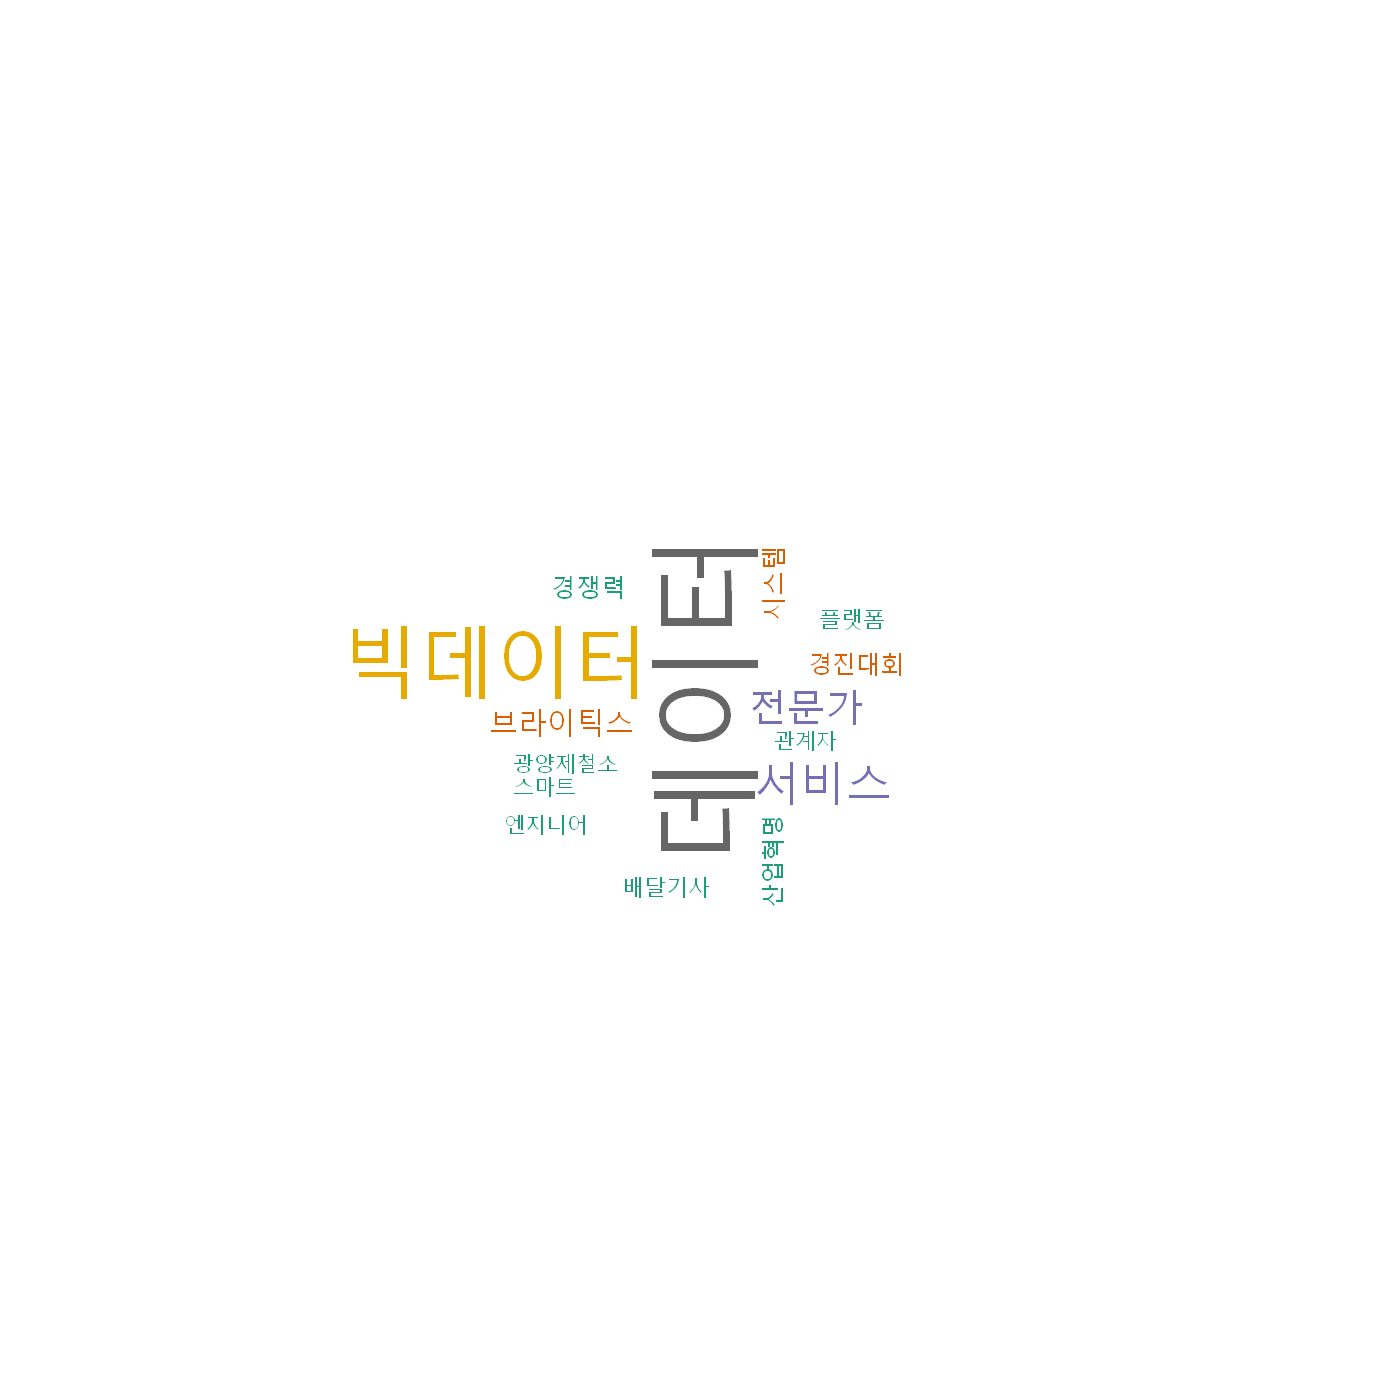

In [167]:
wordcloud(words = names(freq),
          freq = freq,
          min.freq=5,
          random.order=F,
          colors = brewer.pal(8,"Dark2"))